In [124]:
#in this we a performing a operation and tarin a model that predict house price based on the given features
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('BHP.csv')
df.head(13)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [126]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [127]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [128]:
df.info

<bound method DataFrame.info of                   area_type   availability  ... balcony   price
0      Super built-up  Area         19-Dec  ...     1.0   39.07
1                Plot  Area  Ready To Move  ...     3.0  120.00
2            Built-up  Area  Ready To Move  ...     3.0   62.00
3      Super built-up  Area  Ready To Move  ...     1.0   95.00
4      Super built-up  Area  Ready To Move  ...     1.0   51.00
...                     ...            ...  ...     ...     ...
13315        Built-up  Area  Ready To Move  ...     0.0  231.00
13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
13317        Built-up  Area  Ready To Move  ...     1.0   60.00
13318  Super built-up  Area         18-Jun  ...     1.0  488.00
13319  Super built-up  Area  Ready To Move  ...     1.0   17.00

[13320 rows x 9 columns]>

In [129]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [130]:
df['bath'] = df['bath'].fillna(df['bath'].mean())
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())
df['size'] = df['size'].fillna("2 BHK")


In [131]:
df.isna().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

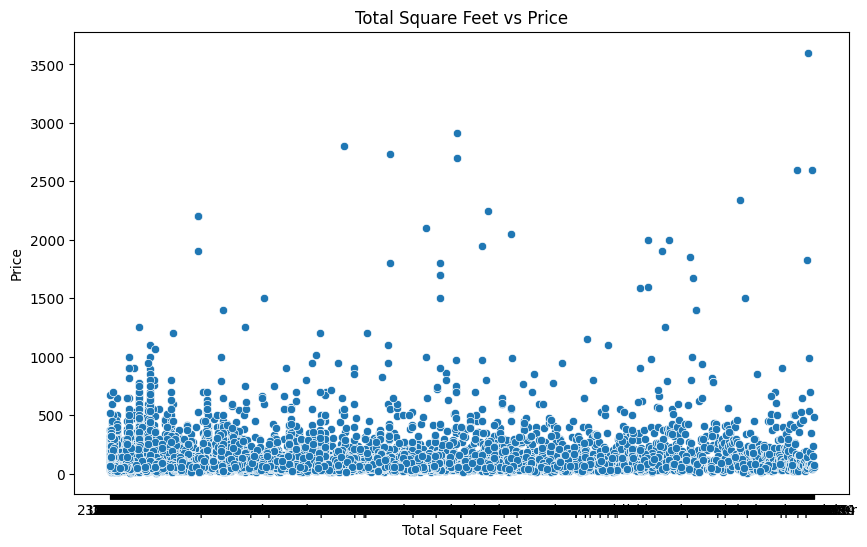

In [132]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['total_sqft'],y=df['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Total Square Feet vs Price')
plt.show()

In [133]:
df['bhk'] = df['size'].str.extract('(\d+)')
df['bhk'] = df['bhk'].astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_4148\191153501.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['bhk'] = df['size'].str.extract('(\d+)')


In [134]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None
        
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [135]:
df = df.dropna(subset=['total_sqft'])



In [136]:
df['total_sqft'].isnull().sum()

np.int64(0)

In [137]:
df.isnull().sum()


area_type          0
availability       0
location           1
size               0
society         5472
total_sqft         0
bath               0
balcony            0
price              0
bhk                0
dtype: int64

In [138]:
df['price_per_sqft'] = df['price'] / df['total_sqft']

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_4148\1699026694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price'] / df['total_sqft']


In [139]:
df['location'] = df['location'].fillna('other')

location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts <= 10].index

df['location'] = df['location'].apply(
    lambda x: 'other' if x in rare_locations else x
)


In [140]:
x=df[['bhk','total_sqft','bath','balcony']] 
y=df['price']

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    random_state=42,
    n_jobs=2,
    min_samples_leaf=5,
    max_features='sqrt'
)
import numpy as np
y_train_log = np.log1p(y_train)

rf.fit(x_train, y_train_log)

y_pred_log = rf.predict(x_test)
y_pred = np.expm1(y_pred_log)

print("R2:", r2_score(y_test, y_pred))


R2: 0.7451882659461999


In [176]:


mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


MAE: 19.292703923609476
RMSE: 31.17787277039792
R2 Score: 0.7451882659461999


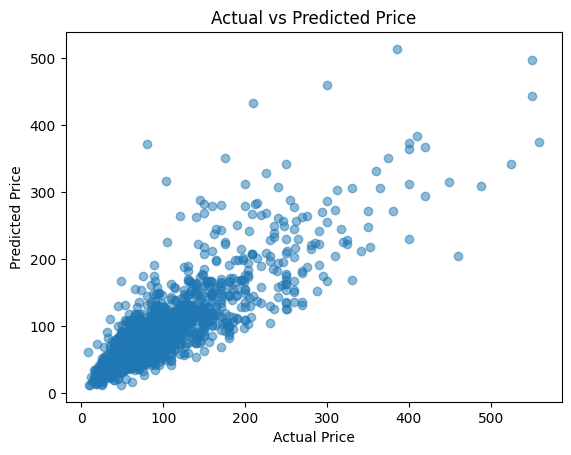

In [172]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
print("Average R²:", scores.mean())


In [177]:
import pickle
pickle.dump(rf, open('house_price_model.pkl','wb'))


In [188]:
import pickle

# Load the saved model
loaded_model = pickle.load(open('house_price_model.pkl', 'rb'))
new_input = np.array([[4, 3300, 4, 1]])
# Use it to predict
y_pred_lg = loaded_model.predict(new_input)
y_pred = np.expm1(y_pred_lg)  # remember inverse of log1p
print("Predicted price for the new input:", y_pred)

Predicted price for the new input: [222.56599925]


C:\Users\Dell 5490T\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
